In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
#Gets data from dataset and sorts it by genres by alphabetic
df = pd.read_csv('cleaned_dataset.csv')
df.sort_values(by=['track_genre'])

,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
41075,43,188.712,0,0.664,0.263,9,-7.988,1,0.0274,0.81400,0.000000,0.0817,0.3710,96.214,4,acoustic
19676,25,226.320,0,0.391,0.322,2,-10.845,1,0.0322,0.88000,0.000000,0.1180,0.2780,180.048,4,acoustic
50943,51,181.596,0,0.566,0.168,3,-12.483,1,0.0372,0.81200,0.000000,0.1250,0.2380,116.286,4,acoustic
61956,63,245.933,0,0.404,0.571,0,-5.069,1,0.0303,0.18200,0.000021,0.1290,0.2900,147.010,4,acoustic
61954,63,158.013,0,0.645,0.169,9,-15.744,1,0.0317,0.84400,0.000190,0.1090,0.1780,167.826,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16323,23,240.000,0,0.526,0.192,10,-19.492,1,0.0327,0.89000,0.942000,0.1000,0.3650,125.962,4,world-music
38124,41,394.626,0,0.441,0.423,0,-9.573,1,0.0291,0.17900,0.000000,0.0639,0.1030,73.900,4,world-music
16246,23,467.089,0,0.396,0.420,5,-8.238,1,0.0315,0.69400,0.000000,0.1320,0.3550,131.472,4,world-music
38039,41,271.586,0,0.312,0.220,8,-9.980,1,0.0411,0.82900,0.000000,0.1030,0.1730,71.038,4,world-music


In [5]:
genre_counts = df['track_genre'].value_counts()
#Filters to top 10 genres and creates a dataet with only those rows
filtered_genre_count = genre_counts[genre_counts >= 958]
print(filtered_genre_count)
df = df[df["track_genre"].str.contains("study|black-metal|comedy|heavy-metal|bluegrass|forro|malay|grindcore|iranian|idm") == True]
df

Series([], Name: count, dtype: int64)


,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8,0,384.962,0,0.486,0.9770,7,-4.172,1,0.1480,0.000004,0.913000,0.1040,0.0835,100.026,4,iranian
11,0,290.306,0,0.486,0.8070,6,-9.928,1,0.1080,0.106000,0.798000,0.2320,0.3540,107.937,4,iranian
12,0,60.107,0,0.174,0.7200,3,-3.623,0,0.0535,0.000321,0.866000,0.5100,0.1960,69.542,4,iranian
14,0,280.000,0,0.328,0.0588,4,-23.095,0,0.0567,0.989000,0.865000,0.0758,0.0679,71.226,4,iranian
15,0,259.746,0,0.513,0.9330,10,-2.695,0,0.1470,0.003970,0.000093,0.0766,0.4870,159.019,4,iranian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64241,67,232.133,0,0.621,0.4030,9,-8.211,1,0.0359,0.581000,0.000000,0.1140,0.6340,145.523,4,bluegrass
65001,69,197.760,1,0.802,0.3410,7,-8.560,1,0.4880,0.169000,0.000000,0.0783,0.8490,166.010,4,comedy
65158,69,193.533,0,0.582,0.3710,2,-9.585,0,0.0280,0.912000,0.007840,0.1080,0.1630,128.756,4,bluegrass
66753,74,328.666,1,0.927,0.3670,9,-7.797,1,0.3820,0.325000,0.000000,0.1320,0.5760,99.053,4,comedy


In [7]:
top_10_genres = df['track_genre'].value_counts().head(10)
print(top_10_genres)

track_genre
heavy-metal    951
forro          948
comedy         928
iranian        925
bluegrass      888
black-metal    851
malay          851
grindcore      819
idm            739
study          699
Name: count, dtype: int64


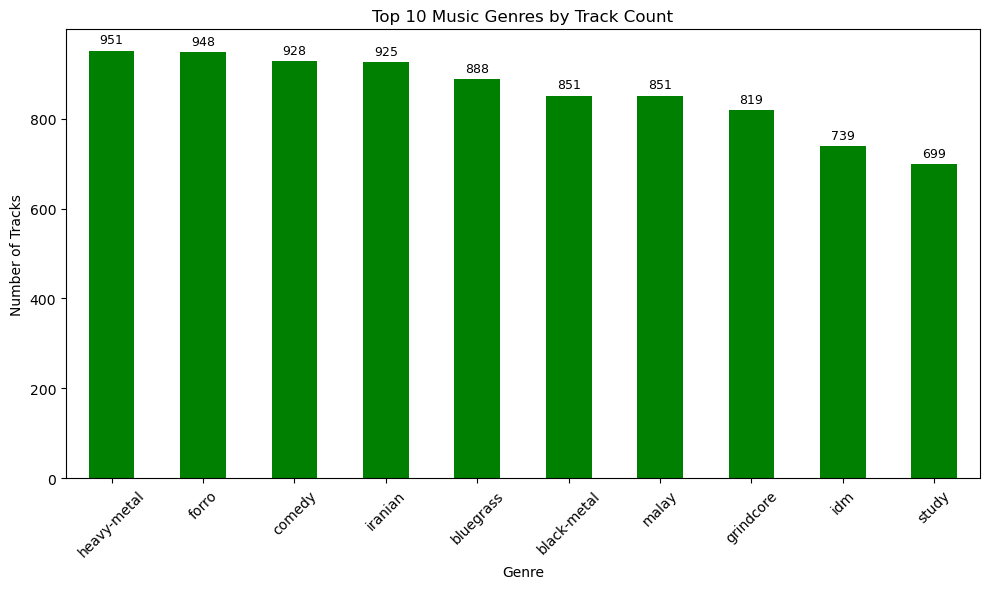

In [18]:
top_10_genres.plot(kind='bar', figsize=(10, 6), color='green')

plt.title('Top 10 Music Genres by Track Count')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
for i, value in enumerate(top_10_genres):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

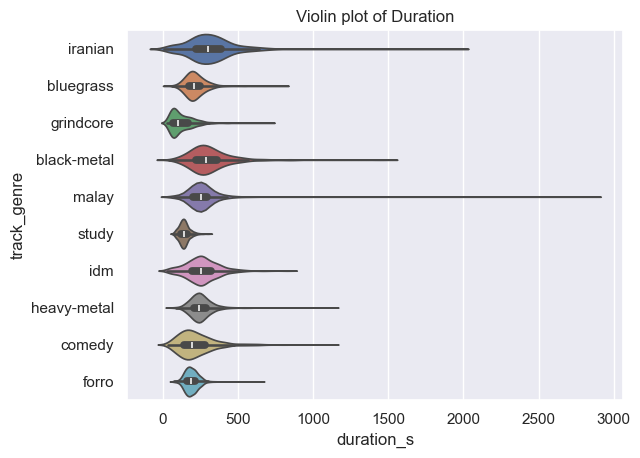

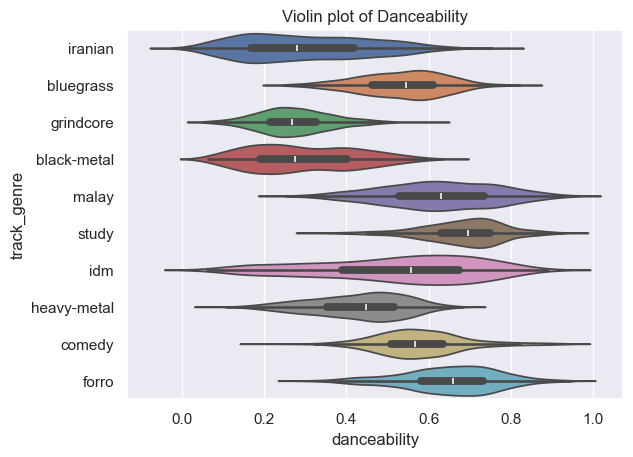

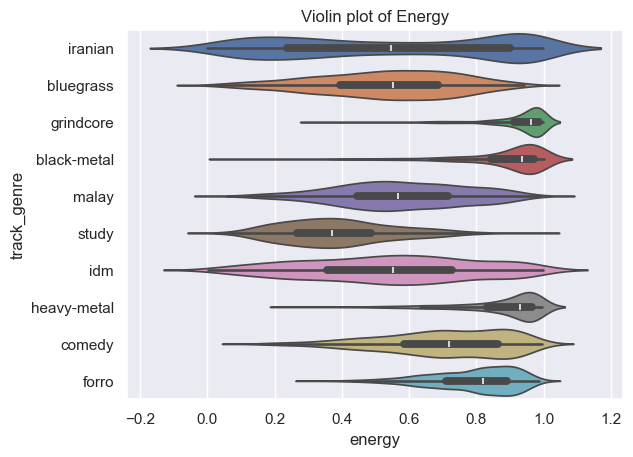

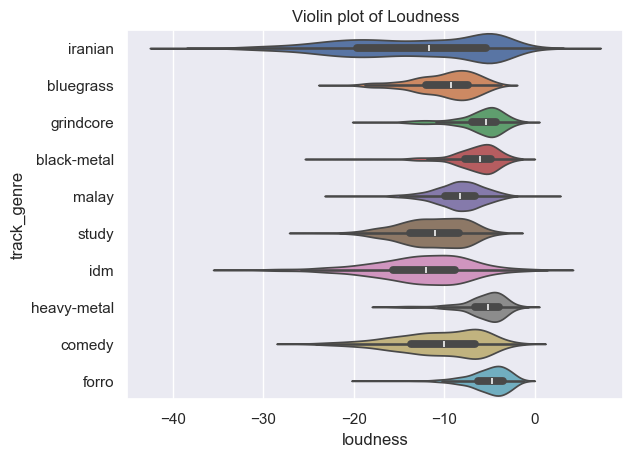

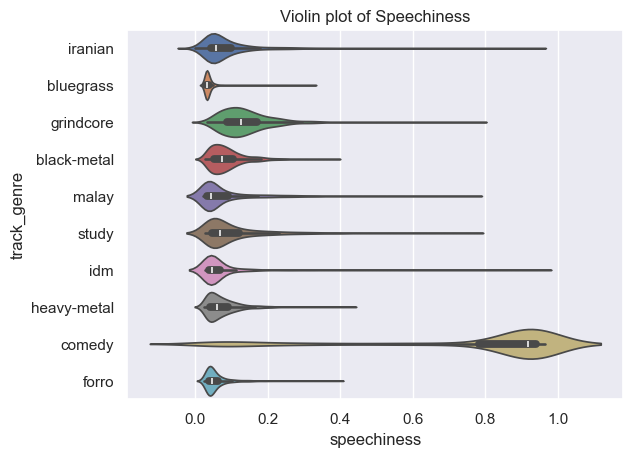

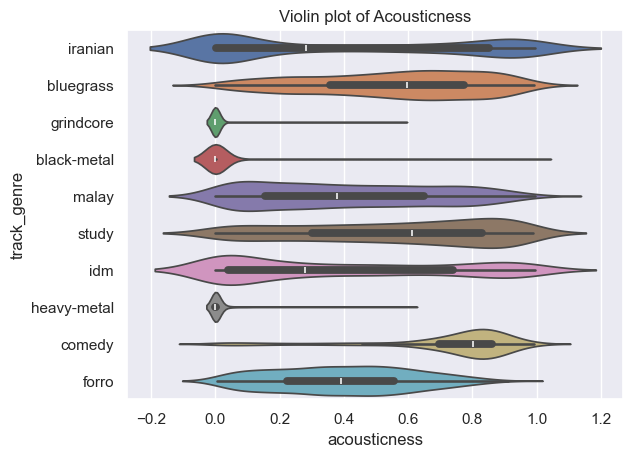

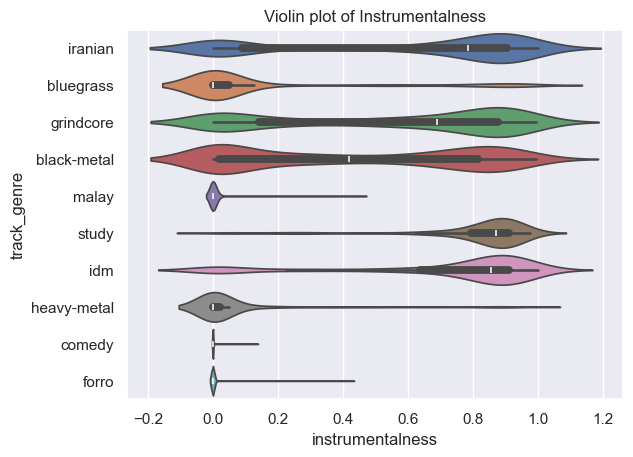

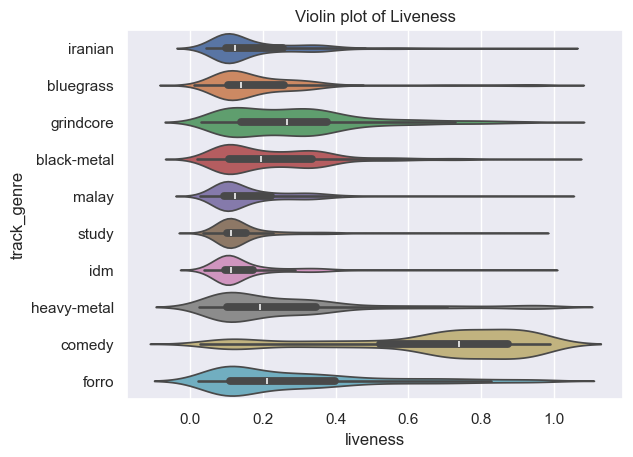

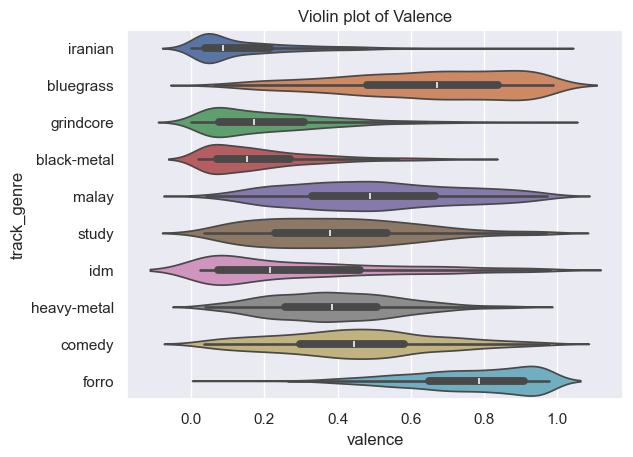

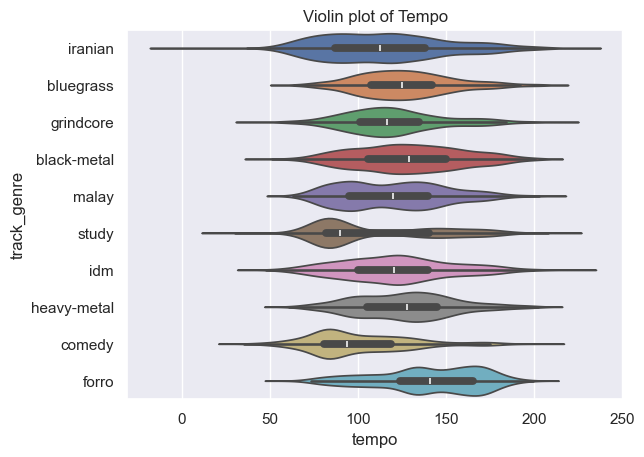

In [3]:
sns.set_theme()
#Violin Plot for Duration
sns.violinplot(hue = 'track_genre', x = 'duration_s', y = 'track_genre', data = df)
plt.title('Violin plot of Duration')
plt.show()
#Violin Plot for Danceability
sns.violinplot(hue = 'track_genre',x = 'danceability', y = 'track_genre', data = df)
plt.title('Violin plot of Danceability')
plt.show()
#Violin Plot for Energy
sns.violinplot(hue = 'track_genre',x = 'energy', y = 'track_genre', data = df)
plt.title('Violin plot of Energy')
plt.show()
#Violin Plot for Loudness
sns.violinplot(hue = 'track_genre',x = 'loudness', y = 'track_genre', data = df)
plt.title('Violin plot of Loudness')
plt.show()
#Violin Plot for Speechiness
sns.violinplot(hue = 'track_genre',x = 'speechiness', y = 'track_genre', data = df)
plt.title('Violin plot of Speechiness')
plt.show()
#Violin Plot for Acousticness
sns.violinplot(hue = 'track_genre',x = 'acousticness', y = 'track_genre', data = df)
plt.title('Violin plot of Acousticness')
plt.show()
#Violin Plot for Instrumentalness
sns.violinplot(hue = 'track_genre',x = 'instrumentalness', y = 'track_genre', data = df)
plt.title('Violin plot of Instrumentalness')
plt.show()
#Violin Plot for Liveness
sns.violinplot(hue = 'track_genre',x = 'liveness', y = 'track_genre', data = df)
plt.title('Violin plot of Liveness')
plt.show()
#Violin Plot for Valence
sns.violinplot(hue = 'track_genre',x = 'valence', y = 'track_genre', data = df)
plt.title('Violin plot of Valence')
plt.show()
#Violin Plot for Tempo
sns.violinplot(hue = 'track_genre',x = 'tempo', y = 'track_genre', data = df)
plt.title('Violin plot of Tempo')
plt.show()
